<a href="https://colab.research.google.com/github/nathaliuw/TP_MACHINE_LEARNING_NB/blob/main/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score

import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [4]:


uploaded = files.upload()



Saving stress_classification.csv to stress_classification.csv


In [6]:
 
df = pd.read_csv('stress_classification.csv', delimiter=';')
df.head()

,snoring_range,respiration_rate,body_temperature,limb_movement_rate,blood_oxygen_levels,rapid_eye_movement,hour_of_sleep,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df.isnull().sum()
df = df.dropna() #supression des lignes avec cases vides, ici tt est rempli donc inutile 


snoring_range          0
respiration_rate       0
body_temperature       0
limb_movement_rate     0
blood_oxygen_levels    0
rapid_eye_movement     0
hour_of_sleep          0
heart_rate             0
stress_level           0
dtype: int64

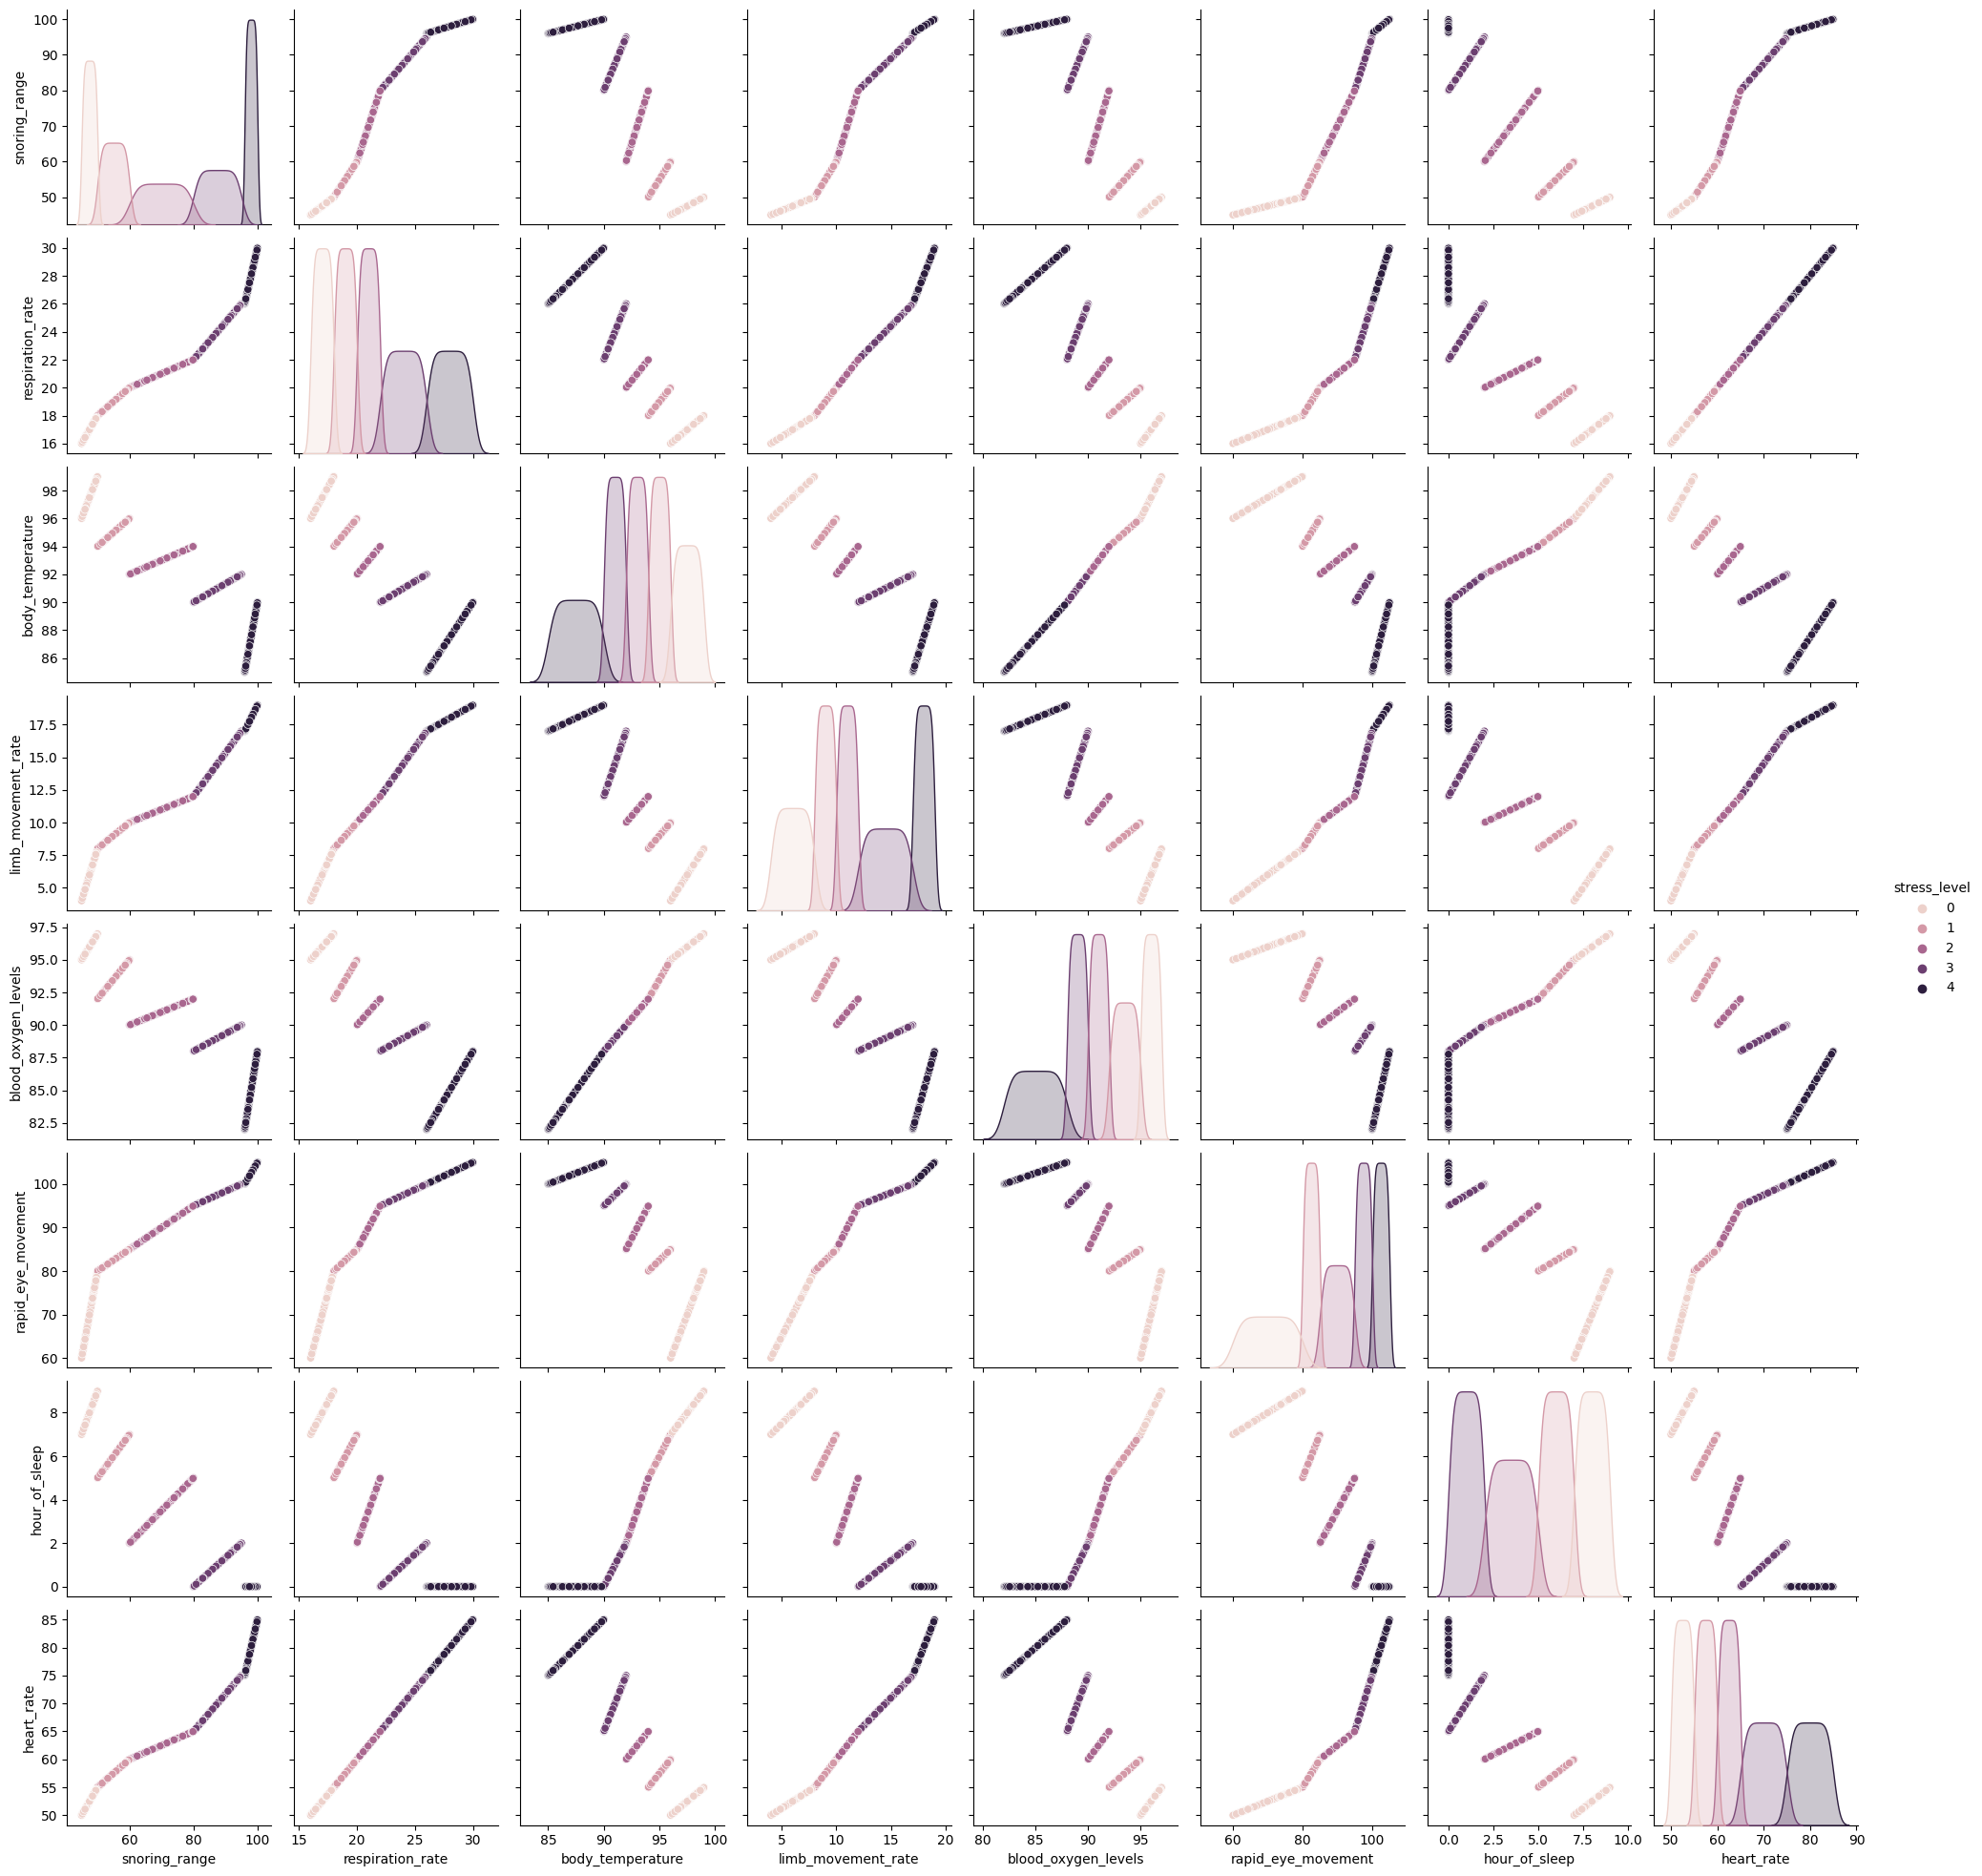

In [ ]:
sns.pairplot(df, hue='stress_level')



<Axes: >

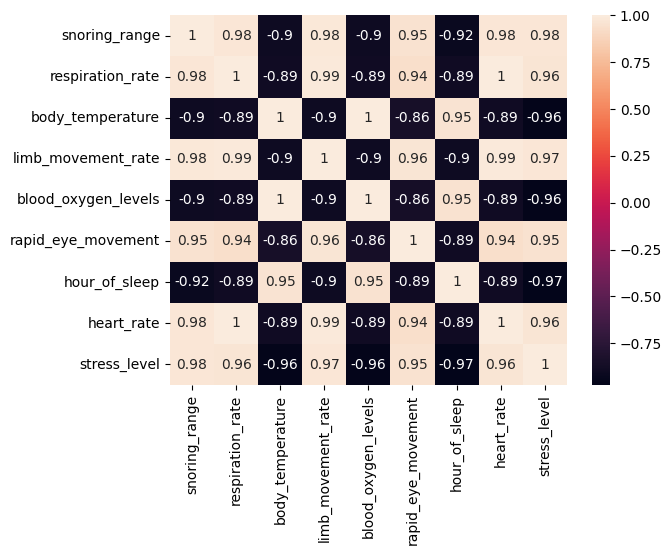

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [19]:




X = df.drop(['snoring_range', 'respiration_rate', 'body_temperature','limb_movement_rate','blood_oxygen_levels','rapid_eye_movement','hour_of_sleep','stress_level'], axis=1)
y = df['stress_level']  # Sélection de la variable cible (target variable)

#entrainement seulement sur les données de frequence cardiaque

# Division en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)







In [25]:

# Define the range of k values to consider
k_values = list(range(1, 21))

# Initialize an empty list to store the cross-validation scores for each k value
cv_scores = []

# Use 5-fold cross-validation to evaluate the performance of the KNN model for each k value
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

# Find the best k value that yields the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]

# Train the KNN model with the best k value on the training dataset
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [26]:
# Predict the target variable for the test dataset using the trained KNN model
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)

# Evaluate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the precision of the KNN classifier
precision = precision_score(y_test, y_pred,average='weighted')

# Evaluate the recall of the KNN classifier
recall = recall_score(y_test, y_pred,average='weighted')

# Evaluate the F1-score of the KNN classifier
f1 = f1_score(y_test, y_pred,average='weighted')

roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('roc_auc', roc_auc)

Accuracy: 0.9761904761904762
Precision: 0.9771000870138802
Recall: 0.9761904761904762
F1-score: 0.9759994600541853
roc_auc 0.9998760887498379


In [27]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)


[[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

#profondeur + importante = meilleur modele 
dt_model = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)


# Evaluate the accuracy of the KNN classifier
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the precision of the KNN classifier
precision = precision_score(y_test, y_pred,average='weighted')

# Evaluate the recall of the KNN classifier
recall = recall_score(y_test, y_pred,average='weighted')

# Evaluate the F1-score of the KNN classifier
f1 = f1_score(y_test, y_pred,average='weighted')

roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('roc_auc', roc_auc)

Accuracy: 0.9761904761904762
Precision: 0.9771000870138802
Recall: 0.9761904761904762
F1-score: 0.9759994600541853
roc_auc 0.9848391318609387


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Séparer les variables indépendantes et dépendante



# Créer un objet régression linéaire
regressor = LinearRegression()

# Adapter le modèle sur les données
regressor.fit(X_train, y_train)

# Prédire les valeurs de y à partir des variables X
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)


# Afficher les coefficients de la régression linéaire
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)


print('R²: ', r2)

Coefficients:  [0.13699592]
Intercept:  -6.852284058507467
R²:  0.9147509646281814


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Séparer les variables indépendantes et dépendante


logreg = LogisticRegression()


logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)


# Evaluate the precision of the KNN classifier
precision = precision_score(y_test, y_pred,average='weighted')

# Evaluate the recall of the KNN classifier
recall = recall_score(y_test, y_pred,average='weighted')

# Evaluate the F1-score of the KNN classifier
f1 = f1_score(y_test, y_pred,average='weighted')

roc_auc = roc_auc_score(y_test, y_pred_prob,multi_class='ovr')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('roc_auc', roc_auc)
# Afficher la précision
print('Accuracy:', accuracy)



Precision: 0.9847629222629223
Recall: 0.9841269841269841
F1-score: 0.9841269841269841
roc_auc 0.9848391318609387
Accuracy: 0.9841269841269841


All the models provide satisfactory performances regarding the accuracy of the predictions, we conclude that the choice will be made for the simplest model, thus the linear regression.